# Model Evaluation and Diagnostics

This notebook is designed to evaluate models that produces an output on each validation image.

In [1]:
# The name of the model (saved as {name}.h5 in trained_models folder)
model_to_evaluate = '2_1_submodel_335'

# The gpu to evaluate model on
gpu = '/GPU:1'

# whether the model outputs prediction as one or two classes
num_classes = 1

# Set up

## Imports

In [2]:
%load_ext autotime
import pandas as pd
import numpy as np
import pickle

import keras
from keras.utils import np_utils
from keras.utils import to_categorical
from keras.models import load_model

from pathlib import Path
from matplotlib import pyplot as plt
%matplotlib inline

from sklearn.metrics import confusion_matrix

import utils

import tensorflow as tf
from keras import backend as K
config = tf.ConfigProto()
config.gpu_options.allow_growth=True
sess = tf.Session(config=config)
K.set_session(sess)

import logging

log = logging.getLogger(__name__)
logging.basicConfig(level=logging.INFO)

Using TensorFlow backend.


## Load model and prepare data

In [3]:
model_file = f'./trained_models/{model_to_evaluate}.h5'
log.info(f'Loading model from {model_file}...')
with tf.device(gpu):
    model = load_model(model_file)

log.info('Preparing dataset...')
x_test, y_test = utils.read_mura_pickle(sample='valid')
size = x_test.shape[1]
x_test = x_test.reshape(x_test.shape[0], size, size, 1)
x_test = utils.normalize_pixels(x_test)
true_label = y_test

log.info('Making predictions...')
y_test_hat = model.predict(x_test)
if num_classes == 1:
    pred_label = np.round(y_test_hat)
elif num_classes == 2:
    pred_label = np.argmax(y_test_hat, axis=1)
else:
    log.error('num_classes must be either 1 or 2!')

INFO:__main__:Loading model from ./trained_models/2_1_submodel_335.h5...
INFO:__main__:Preparing dataset...
INFO:utils.utils:loading data/MURA-v1.1/x_valid.pkl
INFO:utils.utils:loading data/MURA-v1.1/y_valid.pkl
INFO:__main__:Making predictions...


time: 42.3 s


In [4]:
metrics = utils.MURAMetrics(true_label, pred_label)

time: 9.07 ms


INFO:utils.mura_metrics:Accuracy: 0.7832342821395057
INFO:utils.mura_metrics:Kappa: 0.5618702376952556
INFO:utils.mura_metrics:Precision: 0.8467274233637117
INFO:utils.mura_metrics:Recall: 0.6679738562091503


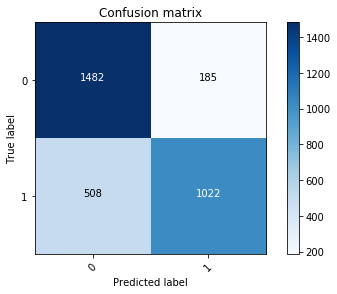

time: 229 ms


In [5]:
_ = metrics.report_by_image()

INFO:utils.mura_metrics:Accuracy: 0.7956630525437864
INFO:utils.mura_metrics:Kappa: 0.5756034274767361
INFO:utils.mura_metrics:Precision: 0.8825065274151436
INFO:utils.mura_metrics:Recall: 0.6282527881040892


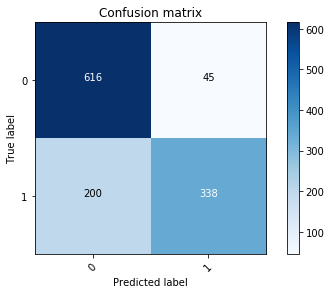

time: 117 ms


In [6]:
_ = metrics.report_by_study(agg='mean')

INFO:utils.mura_metrics:Accuracy: 0.780650542118432
INFO:utils.mura_metrics:Kappa: 0.5571712842491964
INFO:utils.mura_metrics:Precision: 0.7522935779816514
INFO:utils.mura_metrics:Recall: 0.7620817843866171


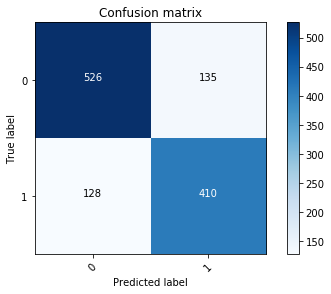

time: 186 ms


In [7]:
_ = metrics.report_by_study(agg='max')

INFO:utils.mura_metrics:==================================================
INFO:utils.mura_metrics:Report for elbow
INFO:utils.mura_metrics:==================================================
INFO:utils.mura_metrics:Accuracy: 0.8291139240506329
INFO:utils.mura_metrics:Kappa: 0.6321779617175374
INFO:utils.mura_metrics:Precision: 0.9333333333333333
INFO:utils.mura_metrics:Recall: 0.6363636363636364


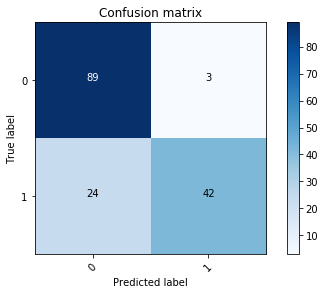

INFO:utils.mura_metrics:==================================================
INFO:utils.mura_metrics:Report for finger
INFO:utils.mura_metrics:==================================================
INFO:utils.mura_metrics:Accuracy: 0.7542857142857143
INFO:utils.mura_metrics:Kappa: 0.5016886298920602
INFO:utils.mura_metrics:Precision: 0.8125
INFO:utils.mura_metrics:Recall: 0.6265060240963856


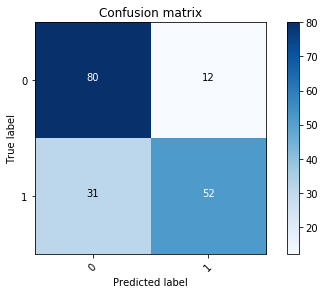

INFO:utils.mura_metrics:==================================================
INFO:utils.mura_metrics:Report for forearm
INFO:utils.mura_metrics:==================================================
INFO:utils.mura_metrics:Accuracy: 0.8120300751879699
INFO:utils.mura_metrics:Kappa: 0.6189985103701157
INFO:utils.mura_metrics:Precision: 0.9534883720930233
INFO:utils.mura_metrics:Recall: 0.640625


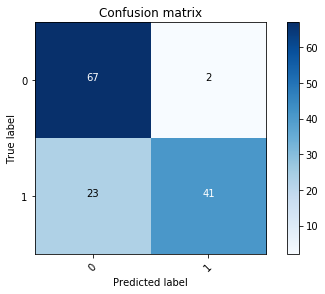

INFO:utils.mura_metrics:==================================================
INFO:utils.mura_metrics:Report for hand
INFO:utils.mura_metrics:==================================================
INFO:utils.mura_metrics:Accuracy: 0.7305389221556886
INFO:utils.mura_metrics:Kappa: 0.3720230634244171
INFO:utils.mura_metrics:Precision: 0.8888888888888888
INFO:utils.mura_metrics:Recall: 0.36363636363636365


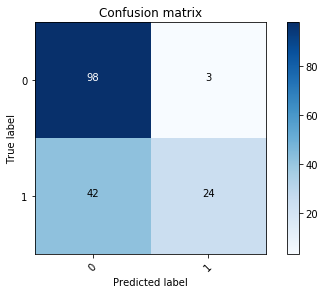

INFO:utils.mura_metrics:==================================================
INFO:utils.mura_metrics:Report for humerus
INFO:utils.mura_metrics:==================================================
INFO:utils.mura_metrics:Accuracy: 0.8296296296296296
INFO:utils.mura_metrics:Kappa: 0.6588287001428415
INFO:utils.mura_metrics:Precision: 0.8928571428571429
INFO:utils.mura_metrics:Recall: 0.746268656716418


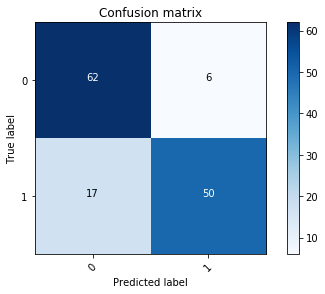

INFO:utils.mura_metrics:==================================================
INFO:utils.mura_metrics:Report for shoulder
INFO:utils.mura_metrics:==================================================
INFO:utils.mura_metrics:Accuracy: 0.7628865979381443
INFO:utils.mura_metrics:Kappa: 0.5231377578283637
INFO:utils.mura_metrics:Precision: 0.8450704225352113
INFO:utils.mura_metrics:Recall: 0.631578947368421


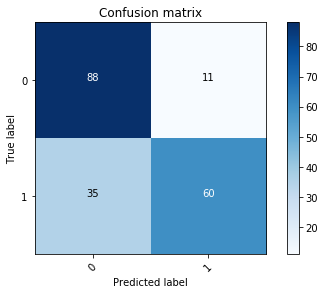

INFO:utils.mura_metrics:==================================================
INFO:utils.mura_metrics:Report for wrist
INFO:utils.mura_metrics:==================================================
INFO:utils.mura_metrics:Accuracy: 0.8481012658227848
INFO:utils.mura_metrics:Kappa: 0.6755893536121672
INFO:utils.mura_metrics:Precision: 0.8961038961038961
INFO:utils.mura_metrics:Recall: 0.711340206185567


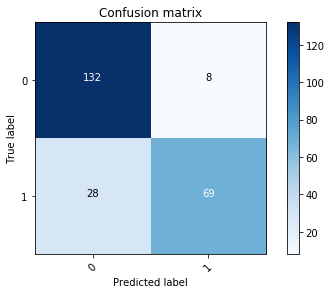

time: 867 ms


In [8]:
_ = metrics.report_by_body_parts(agg='mean')

INFO:utils.mura_metrics:==================================================
INFO:utils.mura_metrics:Report for elbow
INFO:utils.mura_metrics:==================================================
INFO:utils.mura_metrics:Accuracy: 0.7848101265822784
INFO:utils.mura_metrics:Kappa: 0.5499329758713136
INFO:utils.mura_metrics:Precision: 0.7758620689655172
INFO:utils.mura_metrics:Recall: 0.6818181818181818


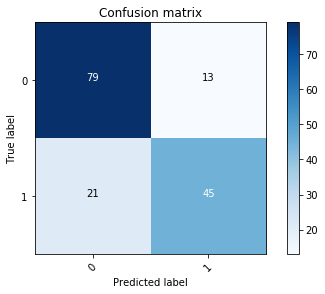

INFO:utils.mura_metrics:==================================================
INFO:utils.mura_metrics:Report for finger
INFO:utils.mura_metrics:==================================================
INFO:utils.mura_metrics:Accuracy: 0.7371428571428571
INFO:utils.mura_metrics:Kappa: 0.4765929778933679
INFO:utils.mura_metrics:Precision: 0.6947368421052632
INFO:utils.mura_metrics:Recall: 0.7951807228915663


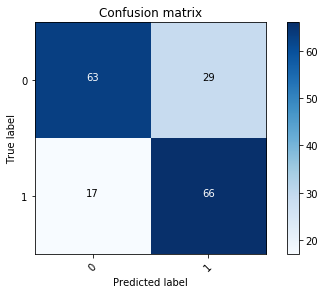

INFO:utils.mura_metrics:==================================================
INFO:utils.mura_metrics:Report for forearm
INFO:utils.mura_metrics:==================================================
INFO:utils.mura_metrics:Accuracy: 0.849624060150376
INFO:utils.mura_metrics:Kappa: 0.697107720337053
INFO:utils.mura_metrics:Precision: 0.9074074074074074
INFO:utils.mura_metrics:Recall: 0.765625


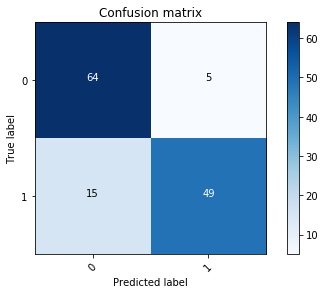

INFO:utils.mura_metrics:==================================================
INFO:utils.mura_metrics:Report for hand
INFO:utils.mura_metrics:==================================================
INFO:utils.mura_metrics:Accuracy: 0.7724550898203593
INFO:utils.mura_metrics:Kappa: 0.4891321848333602
INFO:utils.mura_metrics:Precision: 0.85
INFO:utils.mura_metrics:Recall: 0.5151515151515151


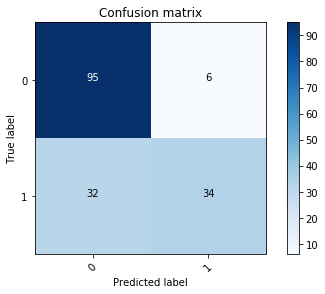

INFO:utils.mura_metrics:==================================================
INFO:utils.mura_metrics:Report for humerus
INFO:utils.mura_metrics:==================================================
INFO:utils.mura_metrics:Accuracy: 0.8148148148148148
INFO:utils.mura_metrics:Kappa: 0.6299747834667251
INFO:utils.mura_metrics:Precision: 0.7763157894736842
INFO:utils.mura_metrics:Recall: 0.8805970149253731


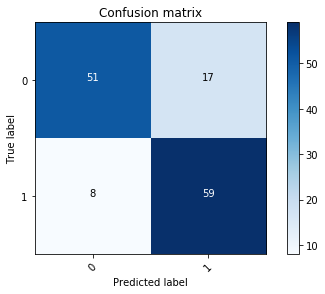

INFO:utils.mura_metrics:==================================================
INFO:utils.mura_metrics:Report for shoulder
INFO:utils.mura_metrics:==================================================
INFO:utils.mura_metrics:Accuracy: 0.7216494845360825
INFO:utils.mura_metrics:Kappa: 0.44542085759661193
INFO:utils.mura_metrics:Precision: 0.6782608695652174
INFO:utils.mura_metrics:Recall: 0.8210526315789474


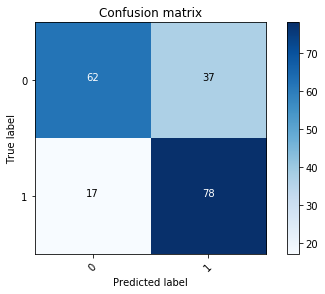

INFO:utils.mura_metrics:==================================================
INFO:utils.mura_metrics:Report for wrist
INFO:utils.mura_metrics:==================================================
INFO:utils.mura_metrics:Accuracy: 0.8059071729957806
INFO:utils.mura_metrics:Kappa: 0.6048568321855745
INFO:utils.mura_metrics:Precision: 0.7383177570093458
INFO:utils.mura_metrics:Recall: 0.8144329896907216


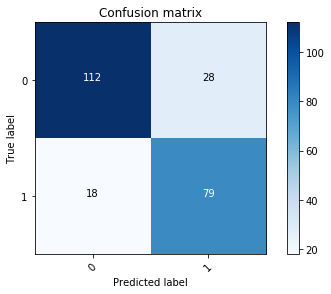

time: 982 ms


In [9]:
_ = metrics.report_by_body_parts(agg='max')